# Pymaceuticals Inc.
---

### Analysis

- Both Capomulin and Ramicane show a lower mean and median tumor volume as compared to the other drug regimens. 
- The data included more timepoints for both Capomulin and Ramicane.
- When viewing a line chart of a mouse on Capomulin, we can see the drop in tumor volume over time. It'd be interesting to have additional timepoints here to see more of the trendline.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left") 

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice. COUNT UNIQUE MOUSE ID
mouse_count = len(complete_data["Mouse ID"].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

complete_data[complete_data[["Mouse ID", "Timepoint"]].duplicated()]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

complete_data[complete_data[["Mouse ID", "Timepoint"]].duplicated()]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

complete_data.drop(complete_data[(complete_data["Mouse ID"] == "g989")].index, inplace=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
#mouse_count = len(complete_data["Mouse ID"].unique())
#mouse_count
complete_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_vol = complete_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
med_tumor_vol = complete_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var_tumor_vol = complete_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sdev_tumor_vol = complete_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_tumor_vol = complete_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({"Mean Tumor Volume":mean_tumor_vol,
                             "Median Tumor Volume":med_tumor_vol,
                             "Tumor Volume Variance":var_tumor_vol,
                             "Tumor Volume Std Dev":sdev_tumor_vol,
                             "Tumor Volume Std Err":sem_tumor_vol
                             })

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

#mean_numpy = np.mean["Tumor Volume (mm3)"] COME BACK TO
# Using the aggregation method, produce the same summary statistics in a single line.

complete_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']}) 


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

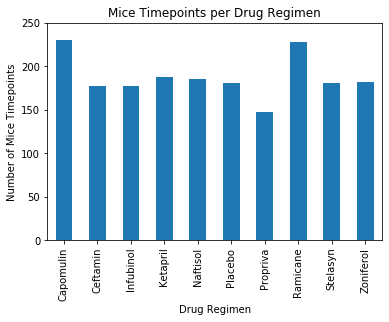

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Filter the DataFrame down only to those columns to chart
x_axis = np.arange(len(complete_data))
tick_locations = [value for value in x_axis]

grouped_complete = complete_data.groupby("Drug Regimen")["Timepoint"].count()

grouped_complete.plot(kind='bar')

# Set y limit
plt.ylim(0,250)

# Set a Title and labels
plt.title("Mice Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Timepoints")
plt.show()

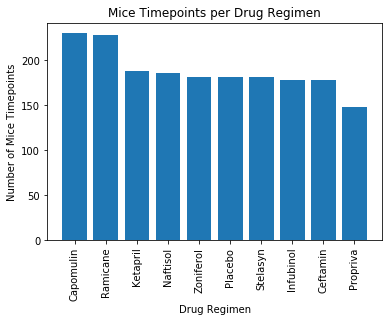

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mouse_count = complete_data["Drug Regimen"].value_counts()
plt.bar(mouse_count.index.values, mouse_count.values)

plt.title("Mice Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Timepoints")
plt.savefig("pandasbar.png")
plt.show()



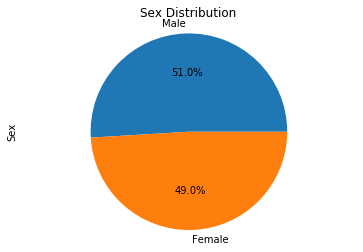

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas 
#sex_type = complete_data.groupby("Sex")

sex_count = complete_data["Sex"].value_counts()

sex_count.plot(kind="pie", autopct="%1.1f%%", title="Sex Distribution")
plt.axis("equal")
plt.show()
                             


In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot (WHAT HAPPENED?)

sex_count = complete_data["Sex"].value_counts()
sex_count.index


labels = sex_count.index

colors = ["orange", "blue"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")

plt.show()


NameError: name 'sizes' is not defined

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mask_1 = ((complete_data["Drug Regimen"] == "Capomulin")|
         (complete_data["Drug Regimen"] == "Ramicane")|
         (complete_data["Drug Regimen"] == "Infubinol")|
         (complete_data["Drug Regimen"] == "Ceftamin"))

four_reg = complete_data.loc[mask_1,["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

final_time = four_reg.groupby("Mouse ID")[["Timepoint"]].max()

final_time = final_time.rename(columns={"Timepoint":"Final Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged = pd.merge(complete_data,final_time, on = "Mouse ID")
merged.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [24]:
# Put treatments into a list for for loop (and later for plot labels)

drug_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#for treatment in treatments:
    
# Create empty list to fill with tumor vol data (for plotting)
capomulin_vol = []
ramicane_vol = []
infubinol_vol = []
ceftamin_vol = []


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for idx, row in merged.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        if row["Timepoint"] == row["Final Timepoint"]:
            capomulin_vol.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Ramicane":
        if row["Timepoint"] == row["Final Timepoint"]:
            ramicane_vol.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Infubinol":
        if row["Timepoint"] == row["Final Timepoint"]:
            infubinol_vol.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Ceftamin":
        if row["Timepoint"] == row["Final Timepoint"]:
            ceftamin_vol.append(row["Tumor Volume (mm3)"])        
            
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#quartiles = DF.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq     

# Capomulin
capomulin_df = pd.Series(capomulin_vol)
quar_capomulin = capomulin_df.quantile([.25,.5,.75])
lowerq_cap = quar_capomulin[0.25]
upperq_cap = quar_capomulin[0.75]
iqr_cap = upperq_cap-lowerq_cap      
    
# Ramicane
ramicane_df = pd.Series(ramicane_vol)
quar_ramicane_df = ramicane_df.quantile([.25,.5,.75])
lowerq_ram = quar_ramicane_df[0.25]
upperq_ram = quar_ramicane_df[0.75]
iqr_ram = upperq_ram-lowerq_ram 

# Infubinol
infubinol_df = pd.Series(infubinol_vol)
quar_infubinol = infubinol_df.quantile([.25,.5,.75])
lowerq_inf = quar_infubinol[0.25]
upperq_inf = quar_infubinol[0.75]
iqr_inf = upperq_inf-lowerq_inf 

# Ceftamin
ceftamin_df = pd.Series(ceftamin_vol)
quar_ceftamin = ceftamin_df.quantile([.25,.5,.75])
lowerq_cef = quar_ceftamin[0.25]
upperq_cef = quar_ceftamin[0.75]
iqr_cef = upperq_cef-lowerq_cef 
    

# add subset  
subset = [capomulin_vol, ramicane_vol, infubinol_vol, ceftamin_vol]
    
# Determine outliers using upper and lower bounds
#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)

lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)

lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)

print(f"Values below {lower_bound_cap} could be Capomulin outliers.")
print(f"Values above {upper_bound_cap} could be Capomulin outliers.")

print(f"Values below {lower_bound_ram} could be Ramicane outliers.")
print(f"Values above {upper_bound_ram} could be Ramicane outliers.")

print(f"Values below {lower_bound_inf} could be Infubinol outliers.")
print(f"Values above {upper_bound_inf} could be Infubinol outliers.")

print(f"Values below {lower_bound_cef} could be Ceftamin outliers.")
print(f"Values above {upper_bound_cef} could be Ceftamin outliers.")

Values below 20.70456164999999 could be Capomulin outliers.
Values above 51.83201549 could be Capomulin outliers.
Values below 17.912664470000003 could be Ramicane outliers.
Values above 54.30681135 could be Ramicane outliers.
Values below 36.83290494999999 could be Infubinol outliers.
Values above 82.74144559000001 could be Infubinol outliers.
Values below 25.355449580000002 could be Ceftamin outliers.
Values above 87.66645829999999 could be Ceftamin outliers.


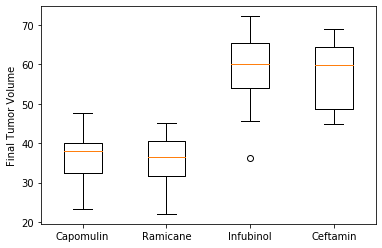

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#fig1, ax1 = plt.subplots()
#ax1.set_title('Final Tumor Volume for Treatment Groups')
#ax1.boxplot(list DF for each drug)
#plt.show()

fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume")
ax1.boxplot(subset)

plt.xticks([1, 2, 3, 4], drug_reg)
plt.show()

## Line and Scatter Plots

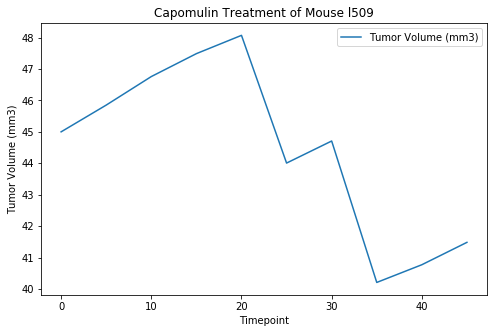

<Figure size 432x288 with 0 Axes>

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = complete_data.loc[complete_data["Drug Regimen"]=="Capomulin",:]
capomulin_l509 = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]

cap_tv_timepoint = capomulin_l509[["Timepoint","Tumor Volume (mm3)"]]
cap_tv_timepoint = cap_tv_timepoint.set_index("Timepoint")

cap_tv_timepoint.plot(kind="line", figsize=(8,5), title="Capomulin Treatment of Mouse l509")

plt.ylabel("Tumor Volume (mm3)")
plt.show()
plt.tight_layout()


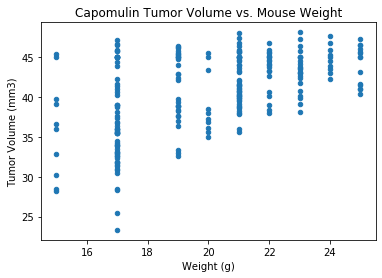

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#(HOW FIX THIS?)(NEED MEAN TUMOR VOL?)


#vol_vs_weight = capomulin_df[["Weight (g)","Tumor Volume (mm3)"]]
#vol_vs_weight = vol_vs_weight.set_index("Weight (g)")

#vol_vs_weight

capomulin_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Capomulin Tumor Volume vs. Mouse Weight") 


plt.ylabel("Tumor Volume (mm3)")
plt.show()
#plt.tight_layout()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen (NEED TO DO MEAN TUMOR VOL)

# Correlation
print(f"The correlation is: {st.pearsonr(capomulin_df["Weight (g)"],capomulin_df["Tumor Volume (mm3)"])[0]}")

# Regression
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"])

pe_fit = pe_slope *  capomulin_df["Weight (g)"] + pe_int
capomulin_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=50, c="blue", alpha=0.5, marker="o")
plt.plot(capomulin_df["Weight (g)"],pe_fit)
      
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (1014820823.py, line 5)